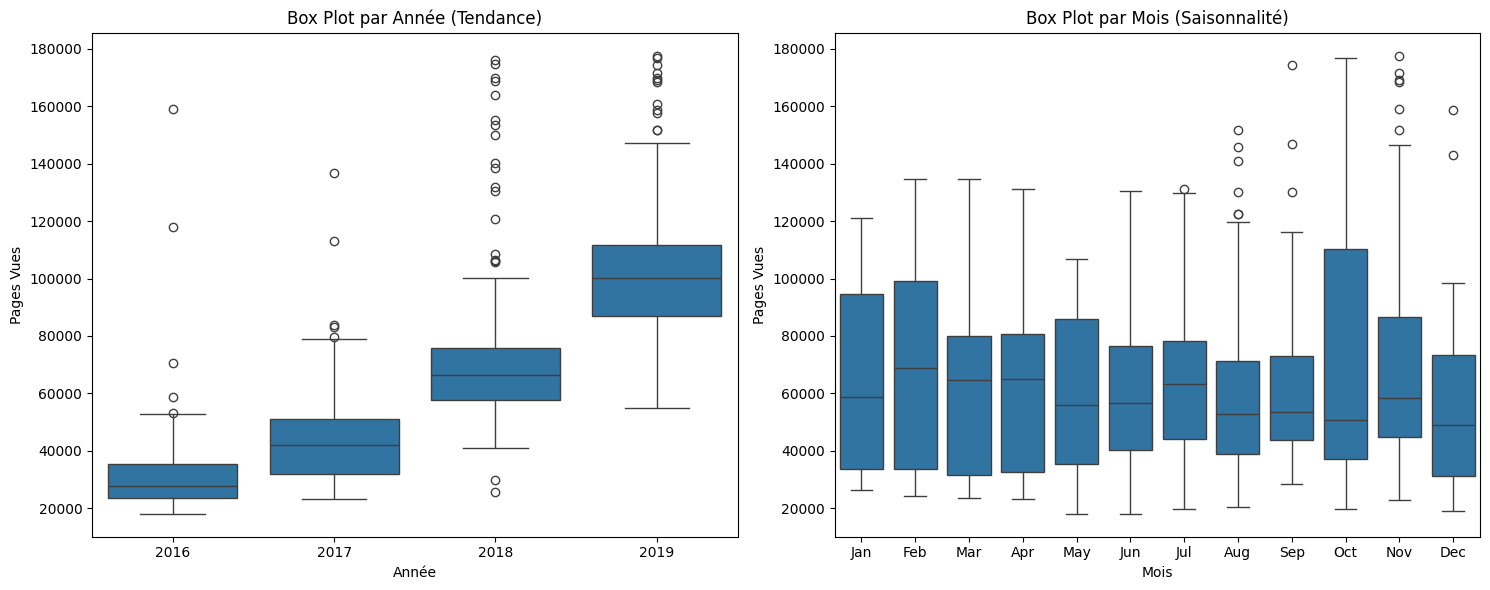

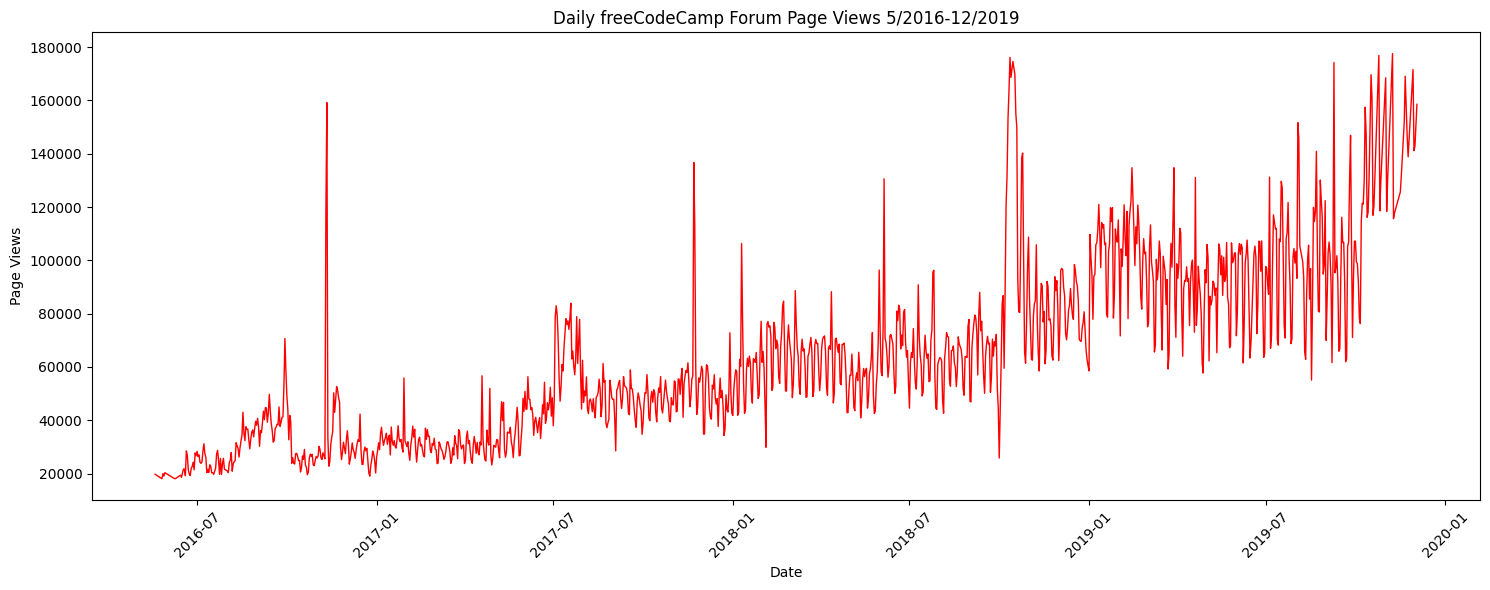

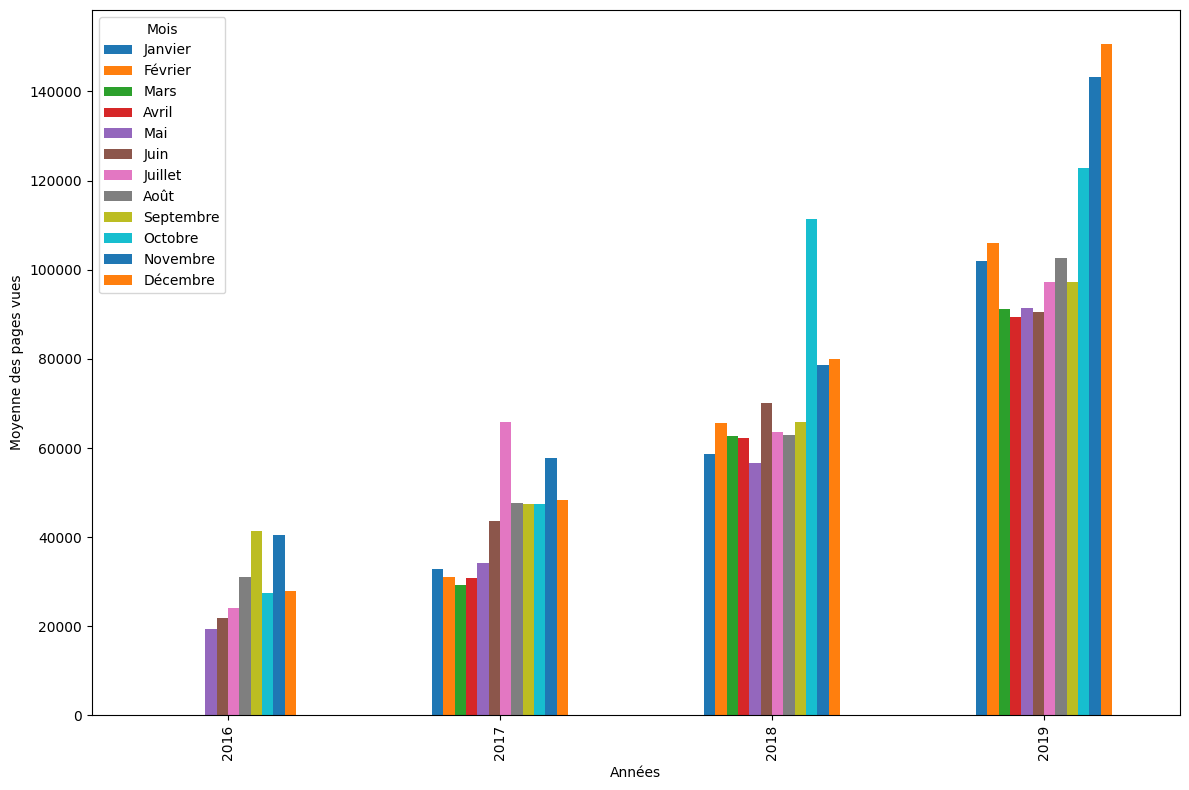

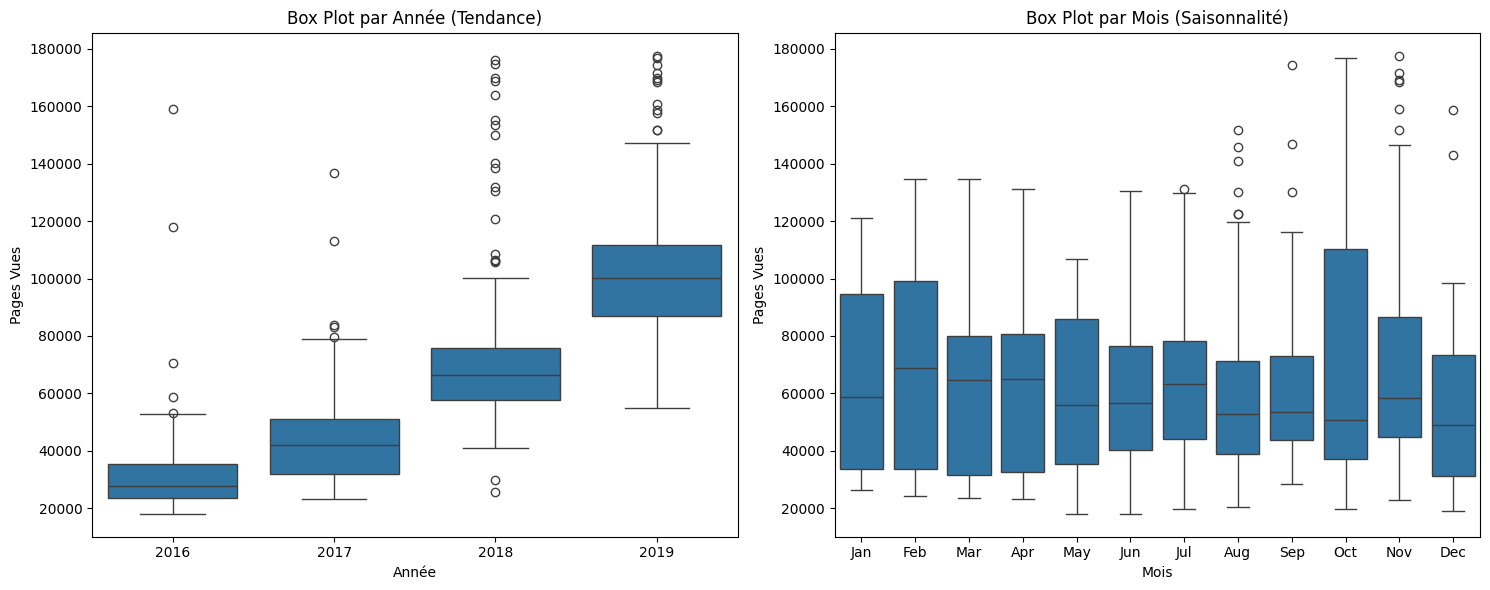

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

# Charger les données et s'assurer que les dates sont bien analysées comme index.
df = pd.read_csv('fcc-forum-pageviews.csv', index_col='date', parse_dates=True)

# Nettoyer les données : garder les valeurs entre les 2.5e et 97.5e percentiles.
df = df[(df['value'] >= df['value'].quantile(0.025)) &
        (df['value'] <= df['value'].quantile(0.975))]

def draw_line_plot():

    fig, ax = plt.subplots(figsize=(15, 6))
    ax.plot(df.index, df['value'], color='red', linewidth=1)
    ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    ax.set_xlabel("Date")
    ax.set_ylabel("Page Views")
    plt.xticks(rotation=45)
    fig.tight_layout()

    # Sauvegarder l'image et retourner l'objet figure
    fig.savefig('line_plot.png')
    return fig

def draw_bar_plot():

    df_bar = df.copy()
    df_bar['year'] = df.index.year
    df_bar['month'] = df.index.month
    df_bar = df_bar.groupby(['year', 'month'])['value'].mean().unstack()

    # Créer le graphique en barres
    fig, ax = plt.subplots(figsize=(12, 8))
    df_bar.plot(kind='bar', ax=ax)
    ax.set_xlabel("Années")
    ax.set_ylabel("Moyenne des pages vues")
    ax.legend(
        title="Mois",
        labels=['Janvier', 'Février', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet',
                'Août', 'Septembre', 'Octobre', 'Novembre', 'Décembre']
    )
    fig.tight_layout()

    # Sauvegarder l'image et retourner l'objet figure
    fig.savefig('bar_plot.png')
    return fig

def draw_box_plot():

    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = df_box['date'].dt.year
    df_box['month'] = df_box['date'].dt.strftime('%b')
    df_box['month_num'] = df_box['date'].dt.month
    df_box.sort_values('month_num', inplace=True)


    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Box plot par année
    sns.boxplot(x='year', y='value', data=df_box, ax=axes[0])
    axes[0].set_title("Box Plot par Année (Tendance)")
    axes[0].set_xlabel("Année")
    axes[0].set_ylabel("Pages Vues")

    # Box plot par mois
    sns.boxplot(x='month', y='value', data=df_box, ax=axes[1], order=[
        'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
        'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
    ])
    axes[1].set_title("Box Plot par Mois (Saisonnalité)")
    axes[1].set_xlabel("Mois")
    axes[1].set_ylabel("Pages Vues")

    fig.tight_layout()

    # Sauvegarder l'image et retourner l'objet figure
    fig.savefig('box_plot.png')
    return fig

draw_line_plot()
draw_bar_plot()
draw_box_plot()